In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical

In [2]:
datax = np.load(join('data','MNIST.npy'))
datay = np.load(join('data','Label.npy'))

In [3]:
datax_norm = datax/255
print('최대 : {}, 최소 : {}'.format(np.max(datax_norm), np.min(datax_norm)))

최대 : 1.0, 최소 : 0.0


**MLP Autoencoder**

In [4]:
datax_reshape = datax_norm.reshape([60000, 28*28])

In [5]:
## Input
input_shape = (28*28,)
input_tensor = layers.Input(input_shape)

## Encoder
encoder1 = layers.Dense(500, activation='relu')(input_tensor)
encoder2 = layers.Dense(300, activation='relu')(encoder1)
encoder3 = layers.Dense(100, activation='relu')(encoder2)

latent_tensor = encoder3

## Decoder
decoder1 = layers.Dense(300, activation='relu')(latent_tensor)
decoder2 = layers.Dense(500, activation='relu')(decoder1)

# Outputs
reconstruction_output = layers.Dense(28*28, activation='relu')(decoder2)

In [6]:
ae = models.Model(input_tensor, reconstruction_output)
ae.compile(optimizer = 'Adam', loss = 'mse')

In [7]:
ae.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 300)               30300     
_________________________________________________________________
dense_4 (Dense)              (None, 500)               150500    
_________________________________________________________________
dense_5 (Dense)              (None, 784)               392784

In [8]:
#parameter
epoch=10
batch_size=1024

ae.fit(datax_reshape, datax_reshape,
       batch_size = batch_size,
       epochs=epoch,
       verbose=2)

Train on 60000 samples
Epoch 1/10
60000/60000 - 1s - loss: 0.0522
Epoch 2/10
60000/60000 - 0s - loss: 0.0221
Epoch 3/10
60000/60000 - 0s - loss: 0.0162
Epoch 4/10
60000/60000 - 0s - loss: 0.0140
Epoch 5/10
60000/60000 - 0s - loss: 0.0126
Epoch 6/10
60000/60000 - 0s - loss: 0.0115
Epoch 7/10
60000/60000 - 0s - loss: 0.0108
Epoch 8/10
60000/60000 - 0s - loss: 0.0104
Epoch 9/10
60000/60000 - 0s - loss: 0.0099
Epoch 10/10
60000/60000 - 0s - loss: 0.0095


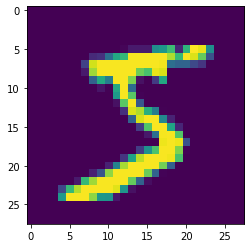

In [9]:
# 원본 데이터 확인
plt.imshow(datax_reshape[0].reshape(28,28))

In [10]:
datax_reshape[0].shape

(784,)

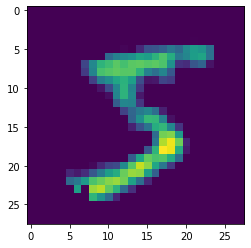

In [11]:
# 데이터를 모델에 넣고 복원시킵니다.
decoded_img = ae.predict(datax_reshape[0].reshape(1,28*28))
decoded_img = decoded_img.reshape(28,28)

# 복원된 데이터 확인
plt.imshow(decoded_img)

In [12]:
np.mean(np.abs(datax_reshape[0] - decoded_img.reshape(784,1)))

0.22460150942108378

In [13]:
random_vector = np.random.rand(784,1)

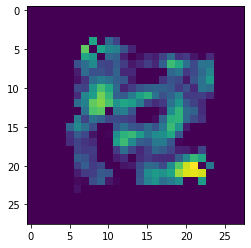

In [14]:
# 데이터를 모델에 넣고 복원시킵니다.
decoded_img = ae.predict(random_vector.reshape(1,28*28))
decoded_img = decoded_img.reshape(28,28)

# 복원된 데이터 확인
plt.imshow(decoded_img)

In [15]:
np.mean(np.abs(random_vector - decoded_img.reshape(784,1)))

0.4441315436595003

**CAE**

In [16]:
datax_reshape = datax_norm.reshape((-1, 28, 28, 1))
print('최대 : {}, 최소 : {}'.format(np.max(datax_norm), np.min(datax_norm)))

최대 : 1.0, 최소 : 0.0


In [17]:
## Input
input_shape = (28, 28, 1)
input_tensor = layers.Input(input_shape)

## Encoder
conv_1 = layers.Conv2D(1, (3,3), padding='same', activation='relu')(input_tensor)
pooling_1 = layers.MaxPool2D(name='latent_layer')(conv_1)

latent_tensor = pooling_1

## Decoding
deconv_2 = layers.Conv2DTranspose(1, (3,3), padding='same', activation='relu')(latent_tensor)
upsample_3 = layers.UpSampling2D()(deconv_2)

# Outputs
output_tensor = layers.Conv2DTranspose(1, (3,3), padding='same', activation='sigmoid')(upsample_3)

In [18]:
ae = models.Model(input_tensor, output_tensor)
ae.compile(optimizer = 'Adam', loss = 'mse')

In [19]:
ae.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 1)         10        
_________________________________________________________________
latent_layer (MaxPooling2D)  (None, 14, 14, 1)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 1)         10        
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         10        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_______________________________________________________________

In [20]:
#parameter
epoch=10
batch_size=1024

ae.fit(datax_reshape, datax_reshape,
       batch_size = batch_size,
       epochs=epoch,
       verbose=2)

Train on 60000 samples
Epoch 1/10
60000/60000 - 2s - loss: 0.2291
Epoch 2/10
60000/60000 - 0s - loss: 0.2157
Epoch 3/10
60000/60000 - 0s - loss: 0.2032
Epoch 4/10
60000/60000 - 0s - loss: 0.1896
Epoch 5/10
60000/60000 - 0s - loss: 0.1737
Epoch 6/10
60000/60000 - 0s - loss: 0.1573
Epoch 7/10
60000/60000 - 0s - loss: 0.1455
Epoch 8/10
60000/60000 - 0s - loss: 0.1371
Epoch 9/10
60000/60000 - 0s - loss: 0.1302
Epoch 10/10
60000/60000 - 0s - loss: 0.1240


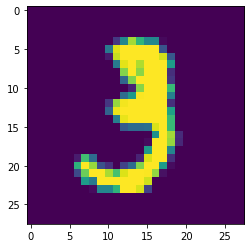

In [21]:
# 원본 데이터 확인
plt.imshow(datax_reshape[10].reshape(28,28))

In [22]:
datax_reshape[10].shape

(28, 28, 1)

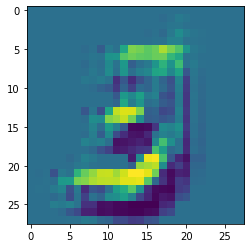

In [23]:
# 데이터를 모델에 넣고 복원시킵니다.
decoded_img = ae.predict(datax_reshape[10].reshape(1,28, 28,1))
decoded_img = decoded_img.reshape(28,28)

# 복원된 데이터 확인
plt.imshow(decoded_img)

In [24]:
intermediate_layer_model = models.Model(inputs=ae.input,
                                 outputs=ae.get_layer('latent_layer').output)
intermediate_output = intermediate_layer_model.predict(datax_reshape[10].reshape(1,28, 28,1))

In [25]:
latent_vector = np.array(intermediate_output)

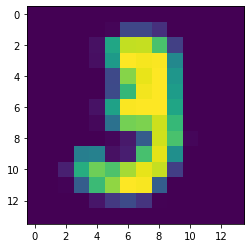

In [26]:
plt.imshow(latent_vector.reshape(14,14))